## Function to get precision and recall for each user -
### 1. It converts predicion( estimation and true value) into per userid information
### 2. It sorts prediction/true values for each user based on higher predicted value first
### 3. it calculates precision and recall based on the formula and only counts if rating are great than 3.0
### 4. It returns the dictionary of userid, precision and recall for each user

In [54]:
from collections import defaultdict
def userPrec_Rec(pred,t,threshold=3.0):
    precision = dict()
    recall = dict()
    userRating = defaultdict(list)
    
    for userid,_,gTruth,estimation,_ in pred:
        userRating[userid].append((estimation,gTruth))
    
    for userid,tru_pred in userRating.items() :
        tru_pred.sort(key=lambda x:x[0], reverse=True)
        recall_deno = sum((gTruth >= threshold) for (_,gTruth) in tru_pred)
        prec_deno = sum((estimation>= threshold) for (estimation,_) in tru_pred[:t])
        both_nemo = sum(((gTruth >= threshold) and (estimation >= threshold)) for (gTruth,estimation) in tru_pred[:t])
        precision[userid] = (both_nemo)/(prec_deno) if prec_deno !=0 else 1
        recall[userid] = (both_nemo)/(recall_deno) if recall_deno != 0 else 1
    
    return precision, recall
        
         
        
    

## Question 36 - plot precision recall against t- values and plot precision v/s recall for KNN

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise import KNNWithMeans

precision = dict()
recall = dict()
t_precision =[]
t_recall =[]



rankings = pd.read_csv('ratings.csv')
#df = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
df = pd.DataFrame(rankings)
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

kfold = KFold(n_splits=10)

for t in range(1,26,1):
    fold_precision = []
    fold_recall =[]
    for trainset, testset in kfold.split(data):
        algo = KNNWithMeans(k=25, sim_options={'name': 'pearson'})
        algo.fit(trainset)
        predictions = algo.test(testset)
        precision, recall = userPrec_Rec(predictions,t,threshold=3.0)
        fold_precision.append((sum(prec for prec in precision.values())/len(precision)))
        fold_recall.append((sum(rec for rec in recall.values())/len(recall)))
    t_precision.append(np.mean(fold_precision))
    t_recall.append(np.mean(fold_recall))


    
#top_recos = top10pred(pred)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

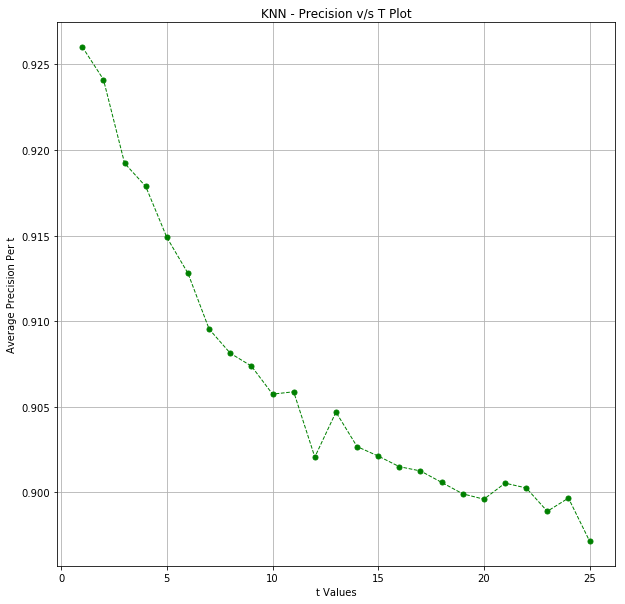

0.897154083164


In [56]:
%matplotlib inline
from matplotlib import pyplot as plt
tvalue =np.arange(1,26,1)
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(tvalue, t_precision, 'go--', linewidth=1, markersize=5)
plt.xlabel('t Values')
plt.ylabel('Average Precision Per t')
plt.title("KNN - Precision v/s T Plot")
plt.grid('on')
plt.show()
print(min(t_precision))


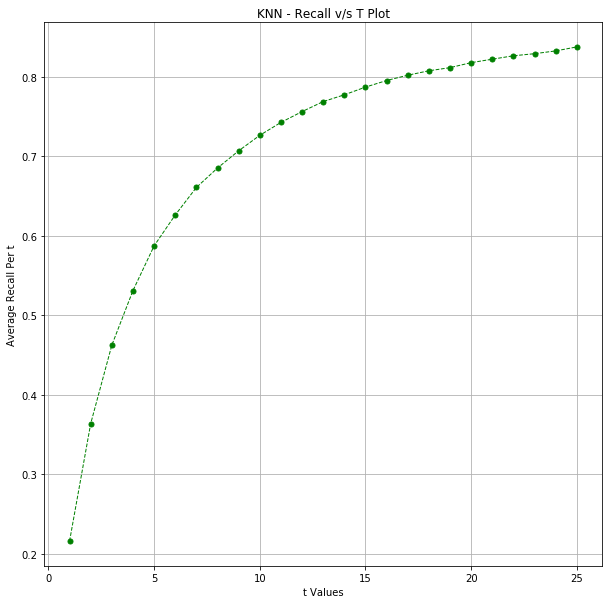

0.215770034088


In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
tvalue =np.arange(1,26,1)
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(tvalue, t_recall, 'go--', linewidth=1, markersize=5)
plt.xlabel('t Values')
plt.ylabel('Average Recall Per t')
plt.title("KNN - Recall v/s T Plot")
plt.grid('on')
plt.show()
print(min(t_recall))

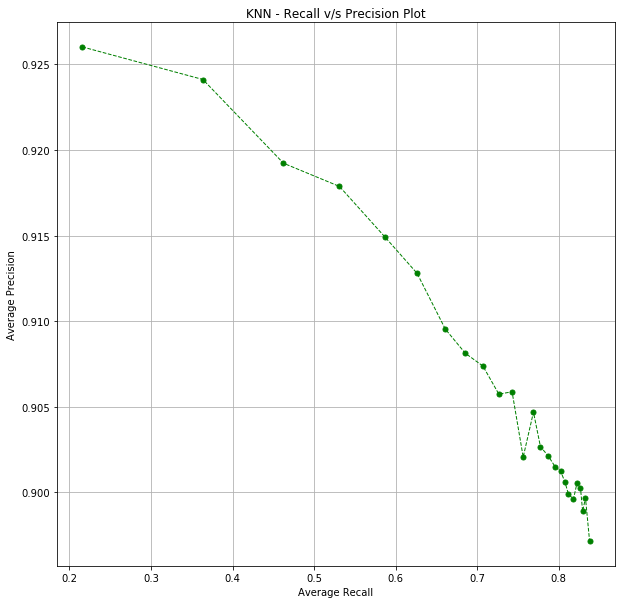

0.897154083164


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(t_recall, t_precision, 'go--', linewidth=1, markersize=5)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title("KNN - Recall v/s Precision Plot")
plt.grid('on')
plt.show()
print(min(t_precision))

## Question 37 - plot precision recall against t- values and plot precision v/s recall for NNMF

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise import NMF

precision_nmf = dict()
recall_nmf = dict()
t_precision_nmf =[]
t_recall_nmf =[]



rankings = pd.read_csv('ratings.csv')
#df = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
df = pd.DataFrame(rankings)
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

kfold = KFold(n_splits=10)

for t in range(1,26,1):
    print("For t value:", t)
    fold_precision_nmf = []
    fold_recall_nmf =[]
    for trainset, testset in kfold.split(data):
        algo = NMF(n_factors=20, verbose=False)
        algo.fit(trainset)
        predictions = algo.test(testset)
        precision_nmf, recall_nmf = userPrec_Rec(predictions,t,threshold=3.0)
        fold_precision_nmf.append((sum(prec for prec in precision_nmf.values())/len(precision_nmf)))
        fold_recall_nmf.append((sum(rec for rec in recall_nmf.values())/len(recall_nmf)))
    t_precision_nmf.append(np.mean(fold_precision_nmf))
    t_recall_nmf.append(np.mean(fold_recall_nmf))


For t value: 1
For t value: 2
For t value: 3
For t value: 4
For t value: 5
For t value: 6
For t value: 7
For t value: 8
For t value: 9
For t value: 10
For t value: 11
For t value: 12
For t value: 13
For t value: 14
For t value: 15
For t value: 16
For t value: 17
For t value: 18
For t value: 19
For t value: 20
For t value: 21
For t value: 22
For t value: 23
For t value: 24
For t value: 25


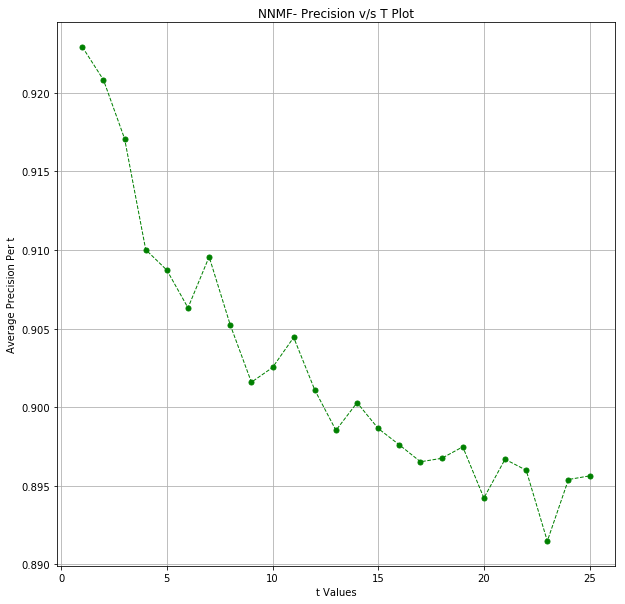

0.891475895527


In [68]:
%matplotlib inline
from matplotlib import pyplot as plt
tvalue =np.arange(1,26,1)
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(tvalue, t_precision_nmf, 'go--', linewidth=1, markersize=5)
plt.xlabel('t Values')
plt.ylabel('Average Precision Per t')
plt.title("NNMF- Precision v/s T Plot")
plt.grid('on')
plt.show()
print(min(t_precision_nmf))

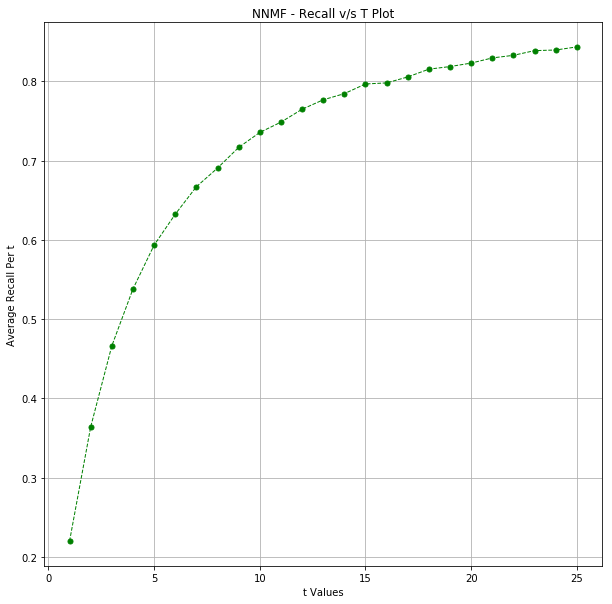

0.219926023971


In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
tvalue =np.arange(1,26,1)
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(tvalue, t_recall_nmf, 'go--', linewidth=1, markersize=5)
plt.xlabel('t Values')
plt.ylabel('Average Recall Per t')
plt.title("NNMF - Recall v/s T Plot")
plt.grid('on')
plt.show()
print(min(t_recall_nmf))

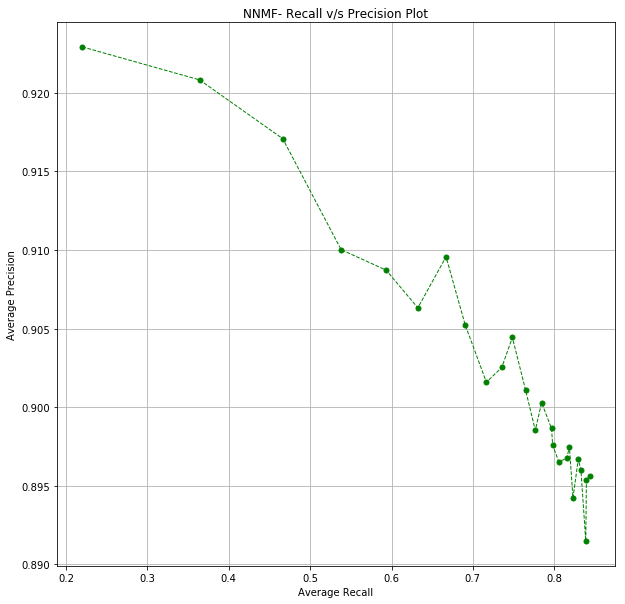

In [70]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(t_recall_nmf, t_precision_nmf, 'go--', linewidth=1, markersize=5)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title("NNMF- Recall v/s Precision Plot")
plt.grid('on')
plt.show()


## Question 38 - Calculate Precision Recall for MF with bias and plot precision recall against t- values and plot precision v/s recall for MF

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise import SVD

precision_svd = dict()
recall_svd = dict()
t_precision_svd =[]
t_recall_svd =[]



rankings = pd.read_csv('ratings.csv')
#df = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
df = pd.DataFrame(rankings)
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

kfold = KFold(n_splits=10)

for t in range(1,26,1):
    print("For t value:", t)
    fold_precision_svd = []
    fold_recall_svd =[]
    for trainset, testset in kfold.split(data):
        algo = SVD(n_factors=12, verbose=False)
        algo.fit(trainset)
        predictions = algo.test(testset)
        precision_svd, recall_svd = userPrec_Rec(predictions,t,threshold=3.0)
        fold_precision_svd.append((sum(prec for prec in precision_svd.values())/len(precision_svd)))
        fold_recall_svd.append((sum(rec for rec in recall_svd.values())/len(recall_svd)))
    t_precision_svd.append(np.mean(fold_precision_svd))
    t_recall_svd.append(np.mean(fold_recall_svd))

For t value: 11
For t value: 12
For t value: 13
For t value: 14
For t value: 15
For t value: 16
For t value: 17
For t value: 18
For t value: 19
For t value: 20
For t value: 21
For t value: 22
For t value: 23
For t value: 24
For t value: 25


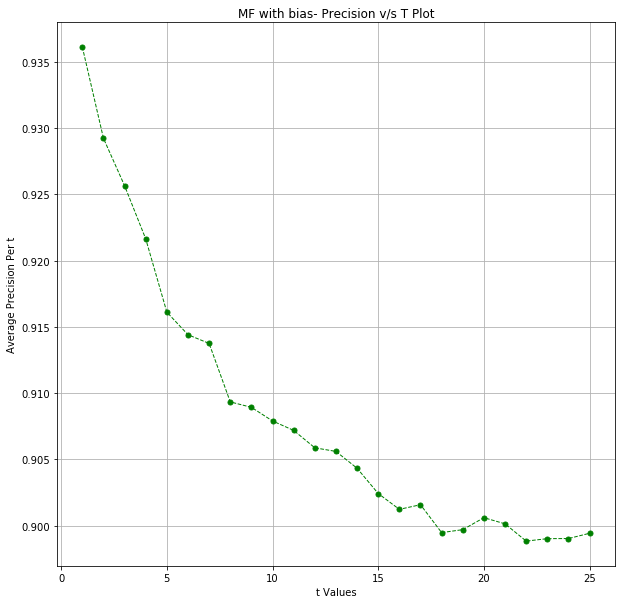

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
tvalue =np.arange(1,26,1)
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(tvalue, t_precision_svd, 'go--', linewidth=1, markersize=5)
plt.xlabel('t Values')
plt.ylabel('Average Precision Per t')
plt.title("MF with bias- Precision v/s T Plot")
plt.grid('on')
plt.show()


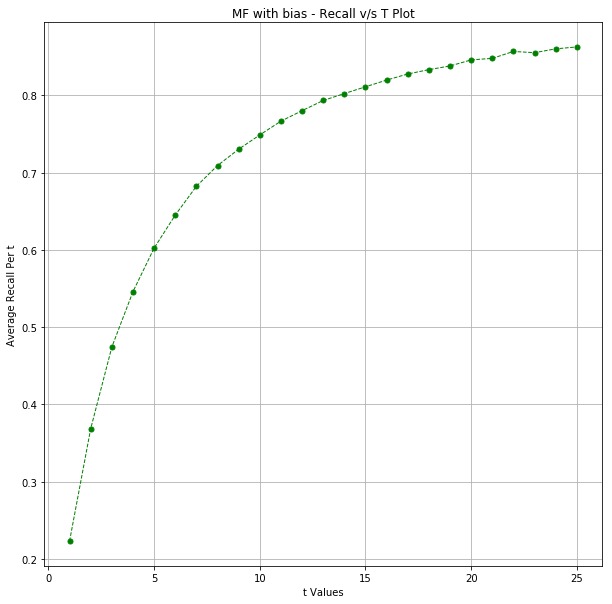

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
tvalue =np.arange(1,26,1)
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(tvalue, t_recall_svd, 'go--', linewidth=1, markersize=5)
plt.xlabel('t Values')
plt.ylabel('Average Recall Per t')
plt.title("MF with bias - Recall v/s T Plot")
plt.grid('on')
plt.show()

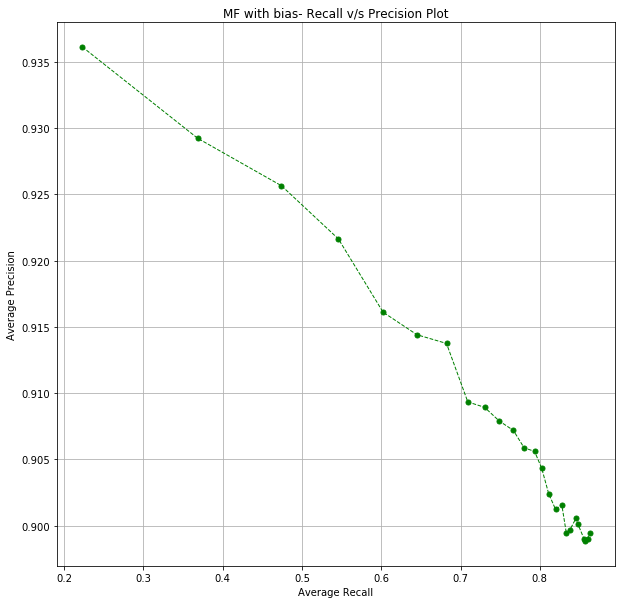

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
width = 1/1.5
plt.plot(t_recall_svd, t_precision_svd, 'go--', linewidth=1, markersize=5)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title("MF with bias- Recall v/s Precision Plot")
plt.grid('on')
plt.show()

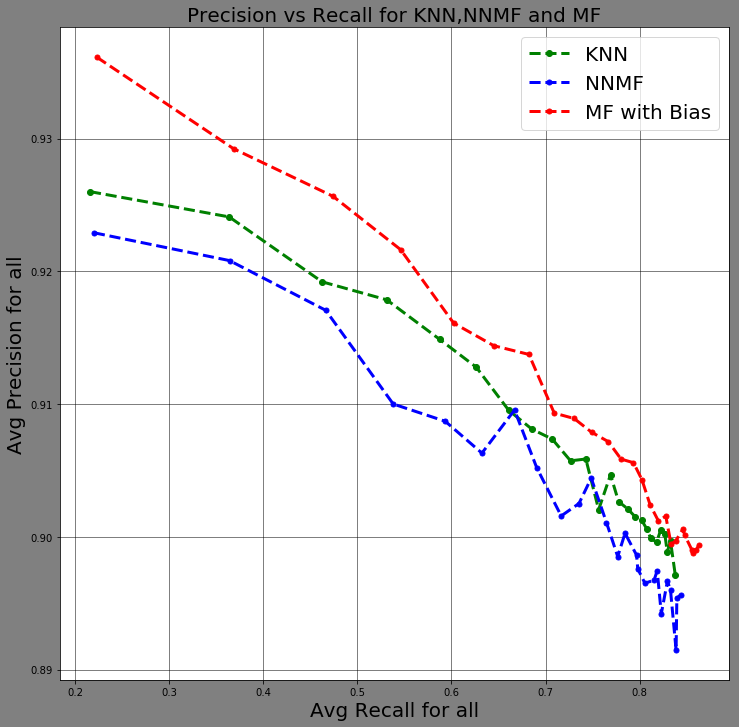

In [78]:
plt.figure(figsize=(12,12),facecolor = 'gray')
plt.plot(t_recall, t_precision, 'go--', linewidth=3, label = 'KNN',color ='green')
plt.plot(t_recall_nmf, t_precision_nmf, 'go--', linewidth=3, markersize=5, label = 'NNMF',color ='blue')
plt.plot(t_recall_svd, t_precision_svd, 'go--', linewidth=3, markersize=5, label = 'MF with Bias',color ='red')

plt.xlabel('Avg Recall for all', fontsize=20)
plt.ylabel('Avg Precision for all', fontsize=20)
plt.title("Precision vs Recall for KNN,NNMF and MF",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=0.5)
plt.legend(fontsize=20)
plt.show()